<a href="https://colab.research.google.com/github/FREDY129053/AI_Systems_LABS/blob/main/Lab_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лаба 3.3: Анализ главных компонент

## Теория

Метод главных компонент (Principal Component Analysis или же PCA) — алгоритм обучения без учителя, используемый для понижения размерности и выявления наиболее информативных признаков в данных. Его суть заключается в предположении о линейности отношений данных и их проекции на подпространство ортогональных векторов, в которых дисперсия будет максимальной.

Такие вектора называются главными компонентами и они определяют направления наибольшей изменчивости (информативности) данных. Альтернативно суть PCA можно определить как линейное проецирование, минимизирующее среднеквадратичное расстояние между исходными точками и их проекциями

В чём же смысл главных компонент? Рассмотрим, к примеру, многомерный набор данных, например характеристики разных сортов винограда: кислотность, содержание сахара, цвет и т. д. Эти характеристики могут быть сильно взаимосвязаны, что затрудняет анализ. PCA позволяет найти те направления в данных, где находится основная часть их вариативности. Эти направления и называются главными компонентами.

Первая главная компонента — это направление, вдоль которого разброс данных максимален. Она содержит максимальную информацию о различиях в данных. Вторая главная компонента перпендикулярна первой и содержит вторую по значимости часть вариативности, и т. д. Каждая следующая компонента объясняет всё меньшую часть общей дисперсии данных

Изначально матрица признаков обязательно центрируется, чтобы первая главная компонента могла соответствовать направлению максимальной вариации данных, а не просто их среднему значению.

*Центрирование матрицы - добавление константы к каждому столбцу, чтобы среднее значение каждого столбца было равно нулю*

Обычно нахождение главных компонент сводится к двум основным методам:
- **Вычисление собственных векторов и собственных значений ковариационной матрицы данных.** Поскольку ковариационная матрица отражает степень линейной связи между различными переменными, то собственные вектора этой матрицы будут задавать направления, вдоль которых дисперсия данных максимальна, а собственные значения — величину этой дисперсии. Собственное значение, соответствующее собственному вектору, характеризует вклад этого вектора в объяснение дисперсии данных и чем больше собственное значение, тем значимее главная компонента. Обычно отбираются только те главные компоненты, которые объясняют заданный уровень дисперсии, например, 95%.
- **Вычисление сингулярного разложения матрицы данных.** Сингулярное разложение — это способ представления любой матрицы в виде произведения трёх других матриц: левой сингулярной матрицы U, диагональной матрицы сингулярных значений S и правой сингулярной матрицы V, где сингулярные значения — это квадратные корни собственных значений ковариационной матрицы данных (именно для этого в данном случае выполняется предварительное центрирование данных), правая сингулярная матрица V будет соответствовать собственным векторам ковариационной матрицы данных, а левая U будет являться проекцией исходных данных на главные компоненты, определённые матрицей V. Таким образом, сингулярное разложение также позволяет выделить главные компоненты, но без необходимости в вычислении ковариационной матрицы. Помимо того, что такое решение более эффективно, оно считается более численно стабильным, поскольку не требует вычисления ковариационной матрицы напрямую, которая может быть плохо обусловлена в случае сильной корреляции признаков. Именно данный подход используется в реализации scikit-learn, но с некоторыми особенностями, рассмотренными ниже.

В математике собственные значения и собственные векторы находят через специальное уравнение: 𝐴 • 𝑣 = λ • 𝑣, где 𝐴 — исходная матрица, 𝑣 — собственный вектор, а λ — собственное значение. Решение этого уравнения даёт нам те направления, которые максимально важны для анализа данных, и величины, показывающие значимость каждого направления.

Для метода PCA собственные векторы определяют новые оси, вдоль которых данные будут разложены. Эти оси упрощают анализ, так как на них можно сосредоточиться на главных компонентах, то есть на наиболее значимых характеристиках данных. А собственные значения помогают понять, какие из осей важнее других: чем больше значение, тем более значимая информация заключена в соответствующем направлении.

PCA на основе SVD строится следующим образом:
1. Сначала происходит центрирование данных, а также определяется число компонент как минимум между числом образцов и признаков в случае, если число компонент не было задано
2. Далее SVD применяется к центрированной матрице данных
3. К матрице U применяется метод svd_flip_vector, который находит максимальные по модулю элементы в каждом столбце матрицы U, извлекает их знаки и умножает матрицу U на эти знаки, чтобы гарантировать детерминированный вывод
4. Объяснённая дисперсия для каждой главной компоненты вычисляется как возведённые в квадрат соответствующие сингулярные значения, разделённые на n_samples - 1, а преобразованные данные вычисляются с учётом числа главных компонент по правилу $X_{new} = X \cdot V = U \cdot S \cdot V^T \cdot V = U \cdot S$

[Статья на Habr + код с 0](https://habr.com/ru/articles/799001/)

[Небольшое объяснение тоже](https://practicum.yandex.ru/blog/metod-glavnyh-komponent/)

## Получение данных

In [30]:
import kagglehub

# Download latest version
DATASET_PATH = kagglehub.dataset_download("brycecf/give-me-some-credit-dataset")

Using Colab cache for faster access to the 'give-me-some-credit-dataset' dataset.


In [31]:
import pandas as pd

train = pd.read_csv(DATASET_PATH + "/cs-training.csv")
train.drop(columns=['Unnamed: 0', 'SeriousDlqin2yrs'], axis=1, inplace=True)

test = pd.read_csv(DATASET_PATH + "/cs-test.csv")
test.drop(columns=['Unnamed: 0', 'SeriousDlqin2yrs'], axis=1, inplace=True)

df = pd.concat([train, test])
df.shape

(251503, 10)

In [32]:
df.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Практические задания

### 1. Воспроизведите вычисления, представленные практической работы. Подтвердите выводы.

In [33]:
import numpy as np
import scipy as sp
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [34]:
np.set_printoptions(precision=10, threshold= 10000, suppress= True)

In [35]:
df = df.dropna(axis=0, how='any')
df.shape

(201669, 10)

In [36]:
df = scale(df)
pca = PCA(svd_solver='full')
pca.fit(df)

PCA(svd_solver='full')

In [37]:
print(f"Размерность данных: {df.shape}")
print("Вклад каждого фактора в объяснение вариации: \n", f"\t{pca.explained_variance_ratio_}")

Размерность данных: (201669, 10)
Вклад каждого фактора в объяснение вариации: 
 	[0.2979766397 0.1496007962 0.1217110055 0.1007219879 0.0999739517
 0.0975640598 0.0735527529 0.055468798  0.0024871325 0.0009428757]


In [38]:
var = np.round(np.cumsum(pca.explained_variance_ratio_), decimals=4)
print("Рост доли объясненной вариации с увеличением числа главных факторов: \n", f"\t{var}")

Рост доли объясненной вариации с увеличением числа главных факторов: 
 	[0.298  0.4476 0.5693 0.67   0.77   0.8675 0.9411 0.9966 0.9991 1.    ]


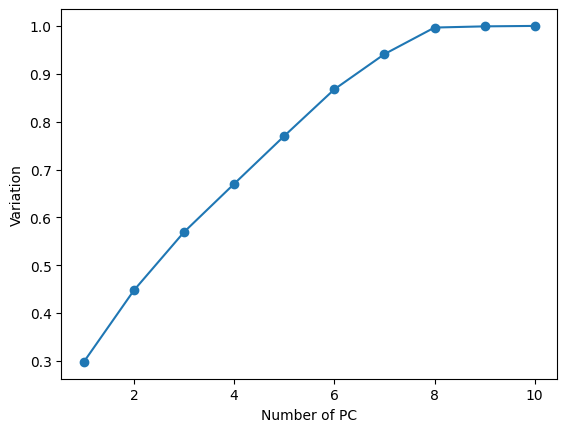

In [39]:
plt.figure()
plt.plot(np.arange(1,11), var, marker='o')
plt.ylabel('Variation')
plt.xlabel('Number of PC')
plt.show()

По графику и по выводу накопленных долей видно, что 8 главных компонент объясняют ~97% диспресии. Это означает, что можно значительно уменьшить размерность данных, сохранив при этом большую часть информации. Например, использование первых 8 главных компонент позволит сохранить почти всю информацию, представленную в исходных 10 признаках.

### 2. Рассмотрите набор данных Turkiye Student Evaluation:
1. Опишите исследуемые данные +
2. Выберите данные по одному предмету (class) и выполните анализ главных компонент. Выделите главные факторы, дайте интерпретацию (или покажите, что этого сделать нельзя). +
3. Выберите два предмета, которые проводил один и тот же преподаватель. Снова выполните анализ главных компонент, выделите главные факторы, постарайтесь дать интерпретацию. Сравните результаты с предыдущим пунктом. +
4. Выполните PCA для всего набора данных. Также сравните результаты с пунктами выше. +
5. Повторите вычисления из пунктов 2 - 4, но для нестандартизованных данных. Сравните с соответствующими результатами, полученными на стандартизованных данных. +

In [11]:
main_df = pd.read_csv("/content/result_lab1_wo_anos.csv")
print(main_df.shape)
main_df.head()

(3623, 33)


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,1,2,1,3,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


Свойства набора данных:
- Набор данных содержит ответы студентов на вопросы о качестве преподавания
предметов
- Каждый вопрос оценивается баллами от 1 до 5
- 28 вопросов о качестве преподавания по пройденному предмету
- 3 преподавателя, 13 предметов
- 3623 объектов (записей) без аномалий

Студенты оценивали параметры difficulty и Q1-Q28. Также приведена информация по посещаемости данным студентом некоторого занятия(attendance), какой раз данный студент проходит данный курс (nb.repeat), номер курса (class) и номер преподавателя (instr).

#### Выбор **одного предмета**

In [12]:
# cls = np.random.randint(1, 13)
cls = 11
cls_df = main_df[main_df['class'] == cls]
print(f"Размер исследуемого датасета для предмета №{cls}: {cls_df.shape}")
cls_df.head()

Размер исследуемого датасета для предмета №11: (329, 33)


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
1125,2,11,1,4,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1126,2,11,1,3,3,1,3,2,2,3,...,5,5,5,5,5,3,4,2,1,3
1127,2,11,1,3,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1128,2,11,1,3,3,1,4,4,3,4,...,5,5,5,5,5,5,5,5,5,5
1129,2,11,1,3,3,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


Вклад каждого фактора в объяснение вариации: 
 	[0.7684218837 0.0477991865 0.0414097714 0.0324407521 0.0208555378
 0.0109914649 0.0096707292 0.0074994363 0.0070774998 0.0056529388
 0.0052406438 0.0043779363 0.0039599518 0.0034834854 0.0034459615
 0.0030910394 0.0027714408 0.0025795411 0.0023299845 0.0022601955
 0.0020928654 0.0019410304 0.0018003599 0.0016505028 0.0014040723
 0.0013561485 0.0012046936 0.0010443202 0.0009183866 0.0007006142
 0.0005276253 0.           0.          ]
Рост доли объясненной вариации с увеличением числа главных факторов: 
 	[0.7684 0.8162 0.8576 0.8901 0.9109 0.9219 0.9316 0.9391 0.9462 0.9518
 0.9571 0.9614 0.9654 0.9689 0.9723 0.9754 0.9782 0.9808 0.9831 0.9854
 0.9875 0.9894 0.9912 0.9928 0.9942 0.9956 0.9968 0.9979 0.9988 0.9995
 1.     1.     1.    ]


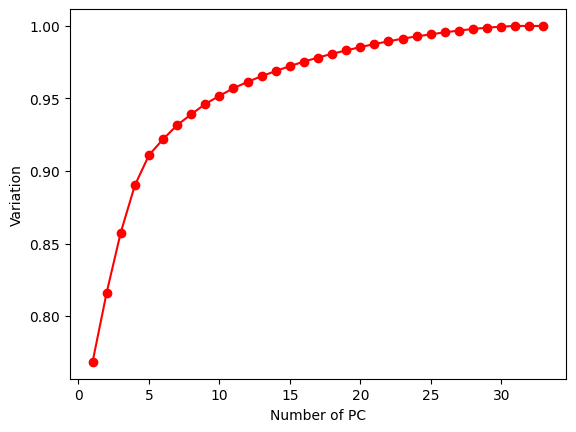

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cls_df = scaler.fit_transform(cls_df)

pca_cls = PCA(svd_solver='full')
pca_cls.fit_transform(scaled_cls_df)

print("Вклад каждого фактора в объяснение вариации: \n", f"\t{pca_cls.explained_variance_ratio_}")

var = np.round(np.cumsum(pca_cls.explained_variance_ratio_), decimals=4)
print("Рост доли объясненной вариации с увеличением числа главных факторов: \n", f"\t{var}")

plt.figure()
plt.plot(np.arange(1,len(var)+1), var, color='red', marker='o', linestyle='solid')
plt.ylabel('Variation')
plt.xlabel('Number of PC')
plt.show()

23 главных компонент объясняют 99% дисперсии, можно снизить размерность на ~1/3

#### Выбор **двух** предметов, которые вел **один** преподаватель

In [14]:
instructor_class = main_df[['instr', 'class']].drop_duplicates().sort_values(by=['instr', 'class'])
print("Преподаватели и предметы, которые они вели:")
display(instructor_class)

Преподаватели и предметы, которые они вели:


,instr,class
0,1,2
105,1,7
237,1,10
544,2,1
736,2,6
1125,2,11
1454,2,13
1496,3,3
2031,3,4
2123,3,5


In [15]:
# Берем преподавателя 3 и предметы 3 и 9
cls3_df = main_df[main_df['class'] == 3]
cls9_df = main_df[main_df['class'] == 9]

In [16]:
print(f"Размер исследуемого датасета для предмета №3: {cls3_df.shape}")
cls3_df.head()

Размер исследуемого датасета для предмета №3: (535, 33)


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
1496,3,3,3,0,1,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1497,3,3,3,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1498,3,3,3,4,5,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1499,3,3,2,1,4,2,3,3,3,4,...,3,3,3,3,4,4,3,3,3,4
1500,3,3,2,0,5,1,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3


In [17]:
print(f"Размер исследуемого датасета для предмета №9: {cls9_df.shape}")
cls9_df.head()

Размер исследуемого датасета для предмета №9: (342, 33)


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
2830,3,9,3,0,5,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2831,3,9,3,3,4,4,4,3,4,4,...,3,3,3,3,3,3,3,3,3,3
2832,3,9,3,3,3,3,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2833,3,9,3,1,4,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2834,3,9,3,0,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


Вклад каждого фактора в объяснение вариации: 
 	[0.8067687892 0.0436544385 0.0322005077 0.0257182112 0.0201172216
 0.0094130292 0.0064071776 0.0052623849 0.0050669653 0.004286956
 0.0038466973 0.0034333946 0.0031659076 0.0029477894 0.0026755383
 0.0024523919 0.0024045783 0.0023373568 0.0021741181 0.0018717295
 0.0017842788 0.0016810367 0.0014407546 0.001400854  0.0013588763
 0.0012690809 0.0010980475 0.0010661188 0.0010012945 0.0009143112
 0.0007801636 0.           0.          ]
Рост доли объясненной вариации с увеличением числа главных факторов: 
 	[0.8068 0.8504 0.8826 0.9083 0.9285 0.9379 0.9443 0.9495 0.9546 0.9589
 0.9627 0.9662 0.9693 0.9723 0.975  0.9774 0.9798 0.9822 0.9843 0.9862
 0.988  0.9897 0.9911 0.9925 0.9939 0.9951 0.9962 0.9973 0.9983 0.9992
 1.     1.     1.    ]


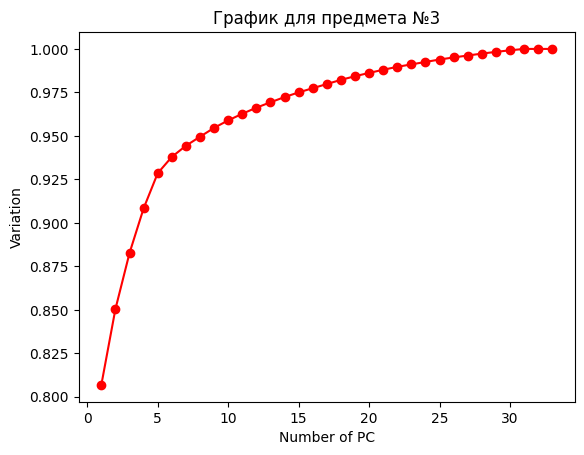

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cls3_df = scaler.fit_transform(cls3_df)

pca_cls3 = PCA(svd_solver='full')
pca_cls3.fit_transform(scaled_cls3_df)

print("Вклад каждого фактора в объяснение вариации: \n", f"\t{pca_cls3.explained_variance_ratio_}")

var = np.round(np.cumsum(pca_cls3.explained_variance_ratio_), decimals=4)
print("Рост доли объясненной вариации с увеличением числа главных факторов: \n", f"\t{var}")

plt.figure()
plt.title("График для предмета №3")
plt.plot(np.arange(1,len(var)+1), var, color='red', marker='o', linestyle='solid')
plt.ylabel('Variation')
plt.xlabel('Number of PC')
plt.show()

Вклад каждого фактора в объяснение вариации: 
 	[0.7500364299 0.057543499  0.0380593108 0.0271924701 0.0179935366
 0.0147742667 0.0097640541 0.0079202484 0.0075381969 0.0071050535
 0.0066478946 0.0057674721 0.0049679102 0.0045477017 0.0043190109
 0.0039523338 0.0038283759 0.0033897477 0.0031900315 0.0029540585
 0.0026173419 0.0025253276 0.0022202918 0.0019459142 0.0018710253
 0.0016002965 0.0014042342 0.0013482331 0.0011433872 0.0010201716
 0.0008121735 0.           0.          ]
Рост доли объясненной вариации с увеличением числа главных факторов: 
 	[0.75   0.8076 0.8456 0.8728 0.8908 0.9056 0.9154 0.9233 0.9308 0.9379
 0.9446 0.9503 0.9553 0.9599 0.9642 0.9681 0.972  0.9753 0.9785 0.9815
 0.9841 0.9866 0.9889 0.9908 0.9927 0.9943 0.9957 0.997  0.9982 0.9992
 1.     1.     1.    ]


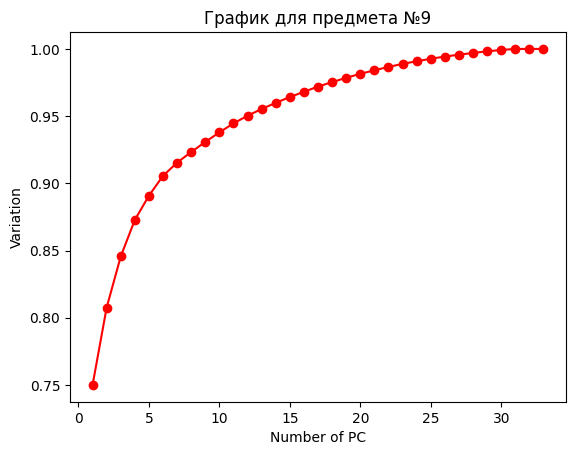

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cls9_df = scaler.fit_transform(cls9_df)

pca_cls9 = PCA(svd_solver='full')
pca_cls9.fit_transform(scaled_cls9_df)

print("Вклад каждого фактора в объяснение вариации: \n", f"\t{pca_cls9.explained_variance_ratio_}")

var = np.round(np.cumsum(pca_cls9.explained_variance_ratio_), decimals=4)
print("Рост доли объясненной вариации с увеличением числа главных факторов: \n", f"\t{var}")

plt.figure()
plt.title("График для предмета №9")
plt.plot(np.arange(1,len(var)+1), var, color='red', marker='o', linestyle='solid')
plt.ylabel('Variation')
plt.xlabel('Number of PC')
plt.show()

У предмета №3 23 главных компонент описывают 99% дисперсии.

У предмета №9 24 главных компонент описывают 99% дисперсии.

Предмет №9 на одну главную компоненту медленнее, чем у предметов №11 и №3

#### Весь датасет

In [20]:
full_df_copy = main_df.copy()
print(f"Размер исследуемого датасета всего: {full_df_copy.shape}")
full_df_copy.head()

Размер исследуемого датасета всего: (3623, 33)


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,1,2,1,3,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


Вклад каждого фактора в объяснение вариации: 
 	[0.7407061748 0.0439764294 0.0340126011 0.0316884449 0.0276818904
 0.0249544931 0.0178488729 0.0084529102 0.007713207  0.0055672928
 0.0052351953 0.0044385927 0.003971501  0.0036462915 0.0032516195
 0.0031057527 0.0029238824 0.0027680609 0.0026857846 0.0024631355
 0.0022844742 0.0022565589 0.0021507538 0.002093038  0.0019248606
 0.0018907047 0.0017743369 0.0017226602 0.0015943533 0.0015228719
 0.0012682134 0.00125022   0.0011748216]
Рост доли объясненной вариации с увеличением числа главных факторов: 
 	[0.7407 0.7847 0.8187 0.8504 0.8781 0.903  0.9209 0.9293 0.937  0.9426
 0.9478 0.9523 0.9562 0.9599 0.9631 0.9663 0.9692 0.9719 0.9746 0.9771
 0.9794 0.9816 0.9838 0.9859 0.9878 0.9897 0.9915 0.9932 0.9948 0.9963
 0.9976 0.9988 1.    ]


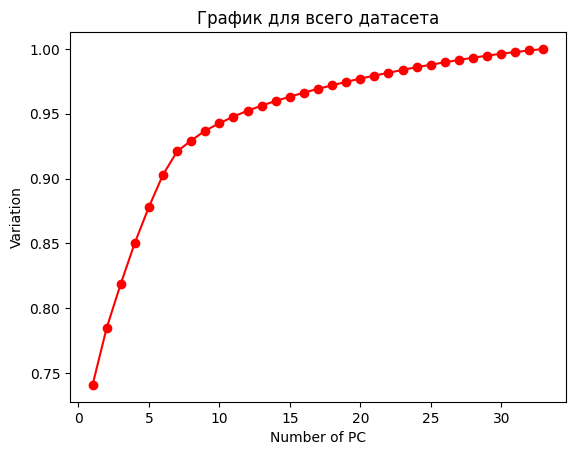

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_full_df = scaler.fit_transform(full_df_copy)

pca_full = PCA(svd_solver='full')
pca_full.fit_transform(scaled_full_df)

print("Вклад каждого фактора в объяснение вариации: \n", f"\t{pca_full.explained_variance_ratio_}")

var = np.round(np.cumsum(pca_full.explained_variance_ratio_), decimals=4)
print("Рост доли объясненной вариации с увеличением числа главных факторов: \n", f"\t{var}")

plt.figure()
plt.title("График для всего датасета")
plt.plot(np.arange(1,len(var)+1), var, color='red', marker='o', linestyle='solid')
plt.ylabel('Variation')
plt.xlabel('Number of PC')
plt.show()

У всего датасета 27 компонент описывают 99% данных, что пока худший из всех данных выше

#### Предмет 11 **нестандартизированный**

Размер исследуемого датасета для предмета №11: (329, 33)
Вклад каждого фактора в объяснение вариации: 
 	[0.7902136903 0.0496590038 0.0387555856 0.0242634166 0.011849597
 0.0104271454 0.0077786018 0.0075740747 0.0058939759 0.0052518945
 0.004597394  0.0044214053 0.0038575588 0.0036136153 0.0034671569
 0.00321041   0.002858295  0.0026439761 0.0023575809 0.0023215451
 0.0022232918 0.0019718045 0.001851366  0.0017330895 0.0014346183
 0.0013675222 0.0012085678 0.0010408162 0.0009320817 0.0007015406
 0.0005193781 0.           0.          ]
Рост доли объясненной вариации с увеличением числа главных факторов: 
 	[0.7902 0.8399 0.8786 0.9029 0.9147 0.9252 0.9329 0.9405 0.9464 0.9517
 0.9563 0.9607 0.9645 0.9682 0.9716 0.9748 0.9777 0.9803 0.9827 0.985
 0.9872 0.9892 0.9911 0.9928 0.9942 0.9956 0.9968 0.9978 0.9988 0.9995
 1.     1.     1.    ]


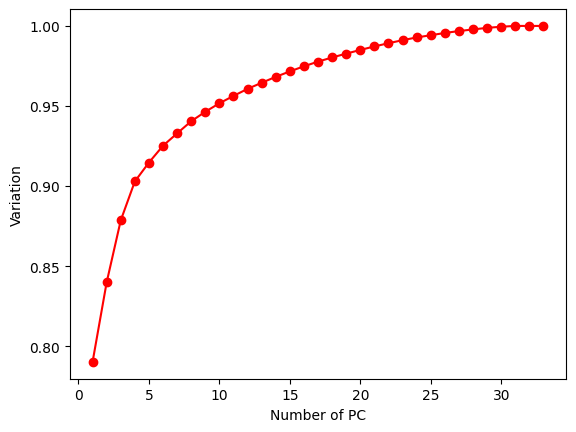

In [22]:
cls = 11
cls_df2 = main_df[main_df['class'] == cls]
print(f"Размер исследуемого датасета для предмета №{cls}: {cls_df.shape}")

pca_cls = PCA(svd_solver='full')
pca_cls.fit_transform(cls_df2)

print("Вклад каждого фактора в объяснение вариации: \n", f"\t{pca_cls.explained_variance_ratio_}")

var = np.round(np.cumsum(pca_cls.explained_variance_ratio_), decimals=4)
print("Рост доли объясненной вариации с увеличением числа главных факторов: \n", f"\t{var}")

plt.figure()
plt.plot(np.arange(1,len(var)+1), var, color='red', marker='o', linestyle='solid')
plt.ylabel('Variation')
plt.xlabel('Number of PC')
plt.show()

23 компоненты описывают 99% дисперсии

#### Предметы 3 и 9 **нестандартизированные**

In [23]:
cls3_df2 = main_df[main_df['class'] == 3]
cls9_df2 = main_df[main_df['class'] == 9]

Вклад каждого фактора в объяснение вариации: 
 	[0.8240161693 0.038270389  0.0334730614 0.024445182  0.0096177519
 0.0068984832 0.0065454611 0.0053315922 0.0050428696 0.0043315801
 0.0039441553 0.0035058028 0.0032234345 0.0030500828 0.0027302068
 0.0025172937 0.0024595106 0.0023740605 0.002217953  0.001929709
 0.0018169593 0.0017276312 0.001483798  0.0014452382 0.0013920455
 0.0012952137 0.00111968   0.001081669  0.0010200665 0.0009237731
 0.000769177  0.           0.          ]
Рост доли объясненной вариации с увеличением числа главных факторов: 
 	[0.824  0.8623 0.8958 0.9202 0.9298 0.9367 0.9433 0.9486 0.9536 0.958
 0.9619 0.9654 0.9686 0.9717 0.9744 0.9769 0.9794 0.9818 0.984  0.9859
 0.9877 0.9895 0.991  0.9924 0.9938 0.9951 0.9962 0.9973 0.9983 0.9992
 1.     1.     1.    ]


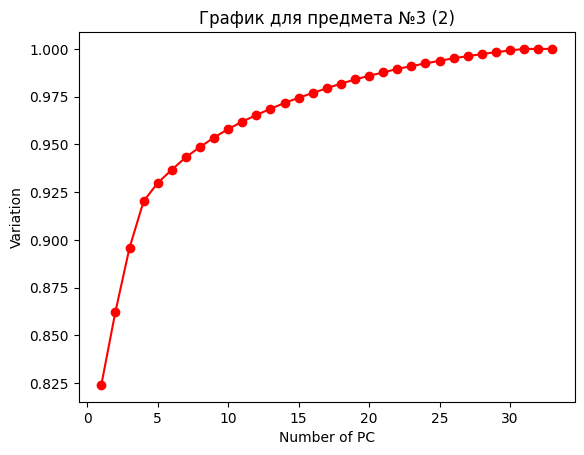

In [24]:
pca_cls3 = PCA(svd_solver='full')
pca_cls3.fit_transform(cls3_df2)

print("Вклад каждого фактора в объяснение вариации: \n", f"\t{pca_cls3.explained_variance_ratio_}")

var = np.round(np.cumsum(pca_cls3.explained_variance_ratio_), decimals=4)
print("Рост доли объясненной вариации с увеличением числа главных факторов: \n", f"\t{var}")

plt.figure()
plt.title("График для предмета №3 (2)")
plt.plot(np.arange(1,len(var)+1), var, color='red', marker='o', linestyle='solid')
plt.ylabel('Variation')
plt.xlabel('Number of PC')
plt.show()

23 компоненты описывают 99% дисперсии у нестандартизированного предмета №3

Вклад каждого фактора в объяснение вариации: 
 	[0.7550623455 0.0583374267 0.0387120655 0.026330649  0.0157482872
 0.0108907406 0.009644478  0.007891662  0.0076720994 0.0071095769
 0.0066711073 0.0058592518 0.0051375325 0.0046366362 0.0043588546
 0.0039648345 0.003860256  0.0034383416 0.0031662351 0.0029624421
 0.0026360785 0.0025732738 0.0022220895 0.0019307742 0.0018663621
 0.0016200952 0.0013646022 0.0013481555 0.001162934  0.0010092109
 0.0008116016 0.           0.          ]
Рост доли объясненной вариации с увеличением числа главных факторов: 
 	[0.7551 0.8134 0.8521 0.8784 0.8942 0.9051 0.9147 0.9226 0.9303 0.9374
 0.9441 0.9499 0.9551 0.9597 0.9641 0.968  0.9719 0.9753 0.9785 0.9815
 0.9841 0.9867 0.9889 0.9908 0.9927 0.9943 0.9957 0.997  0.9982 0.9992
 1.     1.     1.    ]


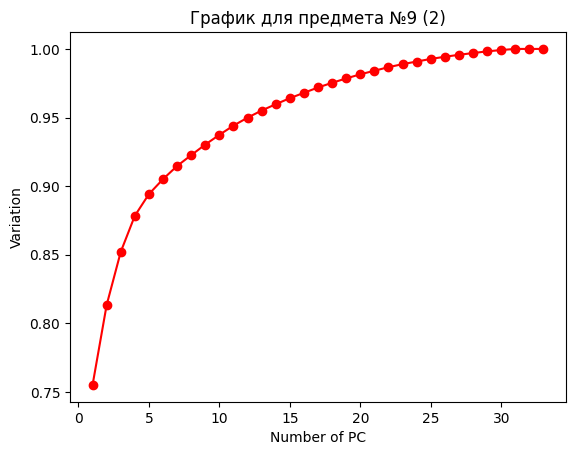

In [25]:
pca_cls9 = PCA(svd_solver='full')
pca_cls9.fit_transform(cls9_df2)
print("Вклад каждого фактора в объяснение вариации: \n", f"\t{pca_cls9.explained_variance_ratio_}")

var = np.round(np.cumsum(pca_cls9.explained_variance_ratio_), decimals=4)
print("Рост доли объясненной вариации с увеличением числа главных факторов: \n", f"\t{var}")

plt.figure()
plt.title("График для предмета №9 (2)")
plt.plot(np.arange(1,len(var)+1), var, color='red', marker='o', linestyle='solid')
plt.ylabel('Variation')
plt.xlabel('Number of PC')
plt.show()

24 главные компоненты описывают 99% дисперсии у нестандартизированного предмета №9

#### Весь датасет **нестандартизированный**

In [ ]:
full_df_copy2 = main_df.copy()
print(f"Размер исследуемого датасета всего: {full_df_copy2.shape}")
full_df_copy2.head()

Размер исследуемого датасета всего: (3623, 33)


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,1,2,1,3,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


Вклад каждого фактора в объяснение вариации: 
 	[0.6160036091 0.2303882381 0.0287497897 0.0246554331 0.0196603269
 0.0095545046 0.0072787014 0.0064868989 0.0049751177 0.0046419714
 0.0043136736 0.0036395716 0.0032516535 0.0030043913 0.0026974973
 0.0026563505 0.0024322776 0.0023637065 0.0022396387 0.002050786
 0.0019044462 0.0018903606 0.0017762738 0.001747285  0.0016059934
 0.0015536467 0.0014619789 0.0014202748 0.0012995447 0.0012572659
 0.0010593677 0.0010224024 0.0009570221]
Рост доли объясненной вариации с увеличением числа главных факторов: 
 	[0.616  0.8464 0.8751 0.8998 0.9195 0.929  0.9363 0.9428 0.9478 0.9524
 0.9567 0.9603 0.9636 0.9666 0.9693 0.972  0.9744 0.9768 0.979  0.981
 0.9829 0.9848 0.9866 0.9884 0.99   0.9915 0.993  0.9944 0.9957 0.997
 0.998  0.999  1.    ]


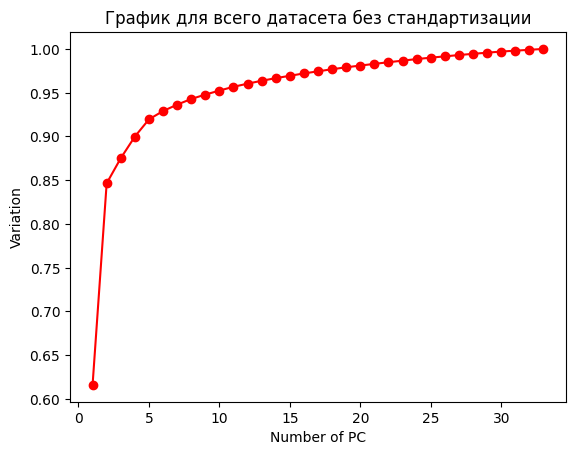

In [ ]:
from sklearn.decomposition import PCA

pca_full2 = PCA(svd_solver='full')
pca_full2.fit_transform(full_df_copy2)

print("Вклад каждого фактора в объяснение вариации: \n", f"\t{pca_full2.explained_variance_ratio_}")

var = np.round(np.cumsum(pca_full2.explained_variance_ratio_), decimals=4)
print("Рост доли объясненной вариации с увеличением числа главных факторов: \n", f"\t{var}")

plt.figure()
plt.title("График для всего датасета без стандартизации")
plt.plot(np.arange(1,len(var)+1), var, color='red', marker='o', linestyle='solid')
plt.ylabel('Variation')
plt.xlabel('Number of PC')
plt.show()

У всего датасета без стандартизации 25 компонент описывают 99% данных, что лучше, чем у стандартизационного датасета. Но следует стандартизировать, т.к. PCA чувствителен к выбросам, но выбросов в датасете нет)

В контексте вашего анализа с датасетом Turkiye Student Evaluation, где есть информация о преподавателях (instr) и предметах (class), анализ PCA на разных подмножествах данных (один предмет, два предмета одного преподавателя, весь датасет) позволяет понять следующее:

- Специфика предметов/преподавателей: Проводя PCA для отдельных предметов или групп предметов одного преподавателя, вы исследуете, как структурируется вариативность внутри этих специфических групп. Разное количество главных компонент, необходимых для объяснения определенной доли дисперсии в разных предметах, может говорить о том, что:
    - В одних предметах оценки студентов более разнообразны и требуют больше компонент для описания.
    - В других предметах оценки более однородны или взаимосвязаны иначе, что позволяет описать их меньшим числом компонент.
- Влияние группировки: Сравнивая результаты PCA для отдельных предметов/преподавателей с результатами для всего датасета, вы видите, как общая структура данных (включающая вариативность между разными преподавателями и предметами) влияет на анализ главных компонент. Тот факт, что для всего датасета требуется больше компонент для объяснения 99% дисперсии, указывает на то, что вариативность между предметами и преподавателями добавляет сложности, которую PCA должен учесть.
- Интерпретация главных компонент: Хотя в данном случае вы не проводили интерпретацию самих главных компонент (т.е. не смотрели на веса признаков в каждой компоненте), в более глубоком анализе вы могли бы попытаться понять, какие именно вопросы или характеристики (difficulty, attendance, Q1-Q28) вносят наибольший вклад в первые главные компоненты для каждого подмножества данных. Это могло бы выявить различия в том, какие аспекты преподавания или предмета являются наиболее "вариативными" или влиятельными с точки зрения оценок студентов в разных контекстах.

Таким образом, анализ PCA на разных уровнях детализации (отдельный предмет, группа предметов, весь датасет) и сравнение результатов помогает понять структуру вариативности данных в зависимости от группирующих факторов (преподаватель, предмет) и оценить, насколько специфичны паттерны оценок студентов для разных преподавателей или предметов.